In [7]:
import numpy as np
import matplotlib.pyplot as plt
plt.style.use(['science','notebook'])
from scipy.special import legendre
from scipy.special import hermite
from scipy.special import factorial

# Tutorial

**The goal of this tutorial is to**

* **(i) Learn to use the special functions from scipy**
* **(ii) Learn to create a bar plot in python**

## Part 1: Special Functions in Python

Throughout your studies in physics, many special functions will be encountered. These include things like the legendre, laguerre, and hermite polynomials. While it is possible to look these up in a table and copy them into python, scipy has these polynomials already coded up.

### Example: Hermite Polynomials

Recall from PHYS 215 that wavefunction for the harmonic oscillator can be written as 

$$\psi_n(x) = \left(\frac{m\omega}{\pi \hbar}\right)^{1/4}\frac{1}{\sqrt{2^nn!}}H_n(\xi)e^{-\xi^2/2} $$

where $\xi=\sqrt{m\omega/\hbar} x$ and $H_n$ are the Hermite polynomials. Plot $\psi_0$, $\psi_1$, $\psi_2$, $\psi_4$, and $\psi_8$ as a function of $\xi$

### Answer

First we import the hermite polynomials from scipy

In [2]:
from scipy.special import hermite

This function takes in a parameter $n$ and returns a `poly1d` object.

In [3]:
hermite_2 = hermite(2)
hermite_2

poly1d([ 4.,  0., -2.])

We can then evaluate the polynomial for arbitrary $\xi$

In [4]:
hermite_2(10)

398.00000000000006

Alternative, you could just do

In [5]:
hermite(2)(10)

398.00000000000006

where (2) specifies the $n$ and (10) specifies the $\xi$ in $H_n(\xi)$. Now lets plot the wave functions. First we define a function that gives us the wave functions (as a function of $\xi$ and $n$). Note that to make everything dimensionless, the function really represents $\left(\frac{\pi \hbar}{m\omega}\right)^{1/4} \psi_n(x)$.

In [18]:
def psi(xi, n):
    return (1/np.sqrt(2**n * factorial(n))) * hermite(n)(xi) * np.exp(-xi**2 /2)

xi = np.linspace(-10, 10, 100)
psi0 = psi(xi, 0)
psi1 = psi(xi, 1)
psi2 = psi(xi, 2)

Now plot

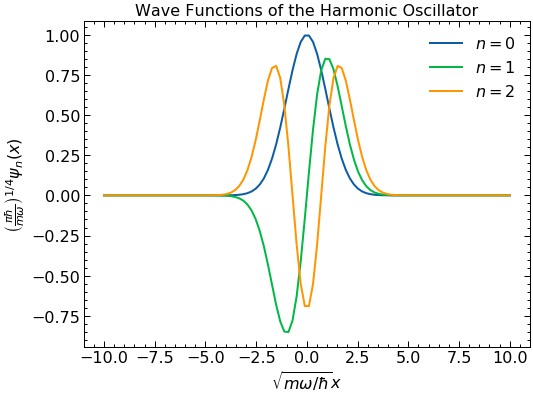

In [17]:
plt.plot(xi, psi0, label='$n=0$')
plt.plot(xi, psi1, label='$n=1$')
plt.plot(xi, psi2, label='$n=2$')
plt.xlabel(r'$\sqrt{m\omega/\hbar} x$')
plt.ylabel(r'$\left(\frac{\pi \hbar}{m\omega}\right)^{1/4} \psi_n(x)$')
plt.title('Wave Functions of the Harmonic Oscillator')
plt.legend()

## Part 2: Bar Plots in Python

For this part of the tutorial, we will consider example 3.4 in Griffiths E&M: suppose, however, that $b=2a$ so that the potential everywhere becomes 

$$V(x,y) = \frac{4V_0}{\pi} \sum_{n=1,3,5,...} \frac{1}{n}\frac{\cosh(n \pi x/a)}{\cosh(2 n \pi)} \sin(n \pi y / a)  $$

we can define the nth term in this sum as 

$$V_n(x,y) = \frac{4V_0}{\pi} \frac{1}{n}\frac{\cosh(n \pi x/a)}{\cosh(2 n \pi)} \sin(n \pi y / a) $$

Consider the point $\vec{r}=(a,a/3,0)$. Make a bar plot of $V_n$ vs. $n$ for $n$ in the range 1 to 33 to show how quickly the terms decay. Use a semilogy axis and only consider odd $n$ (as even $n$ terms are equal to zero).

In [71]:
def Vn(x_a, y_a, n):
    return (1/n)*np.cosh(n*np.pi*x_a)/np.cosh(2*n*np.pi) * np.sin(n * np.pi * y_a)

Get arrays

In [72]:
ns = np.arange(1, 33, 2)
Vns = Vn(1, 1/3, ns)

Plot

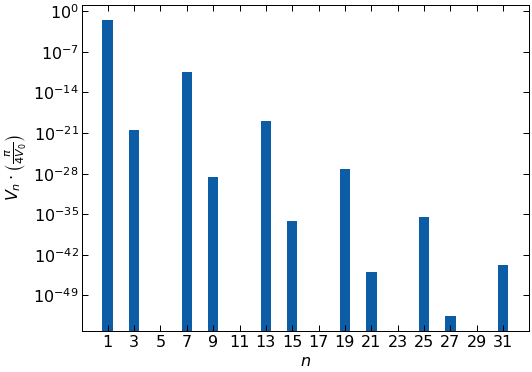

In [73]:
plt.bar(ns, Vns)
plt.semilogy()
plt.xlabel('$n$')
plt.ylabel(r'$V_n\cdot \left(\frac{\pi}{4V_0} \right)$')
plt.minorticks_off()
plt.xticks(ns)
plt.show()

Now consider two points $\vec{r}_1 = (a,a/2,0)$ and $\vec{r}_2 = (a,a/3,0)$. Plot $V_n$ vs. $n$ with the bars next to eachother.

This is a little finicky in python. First lets define out arrays

In [48]:
ns = np.arange(1, 33, 2)
Vns_r1 = Vn(1, 1/2, ns)
Vns_r2 = Vn(1, 1/3, ns)

In order to plot the bars next to eachother, we need to shift the n's slightly.

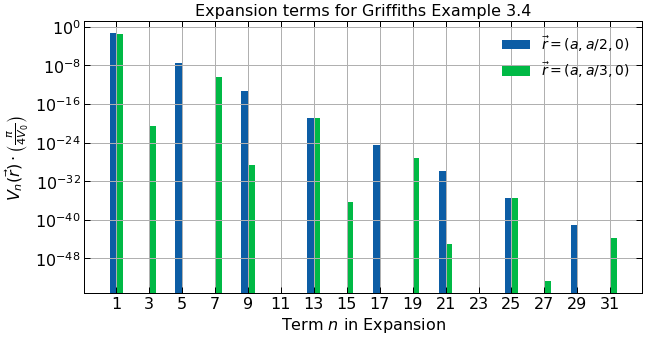

In [50]:
barWidth = 0.4
ns1 = ns-barWidth/2
ns2 = ns+barWidth/2

plt.figure(figsize=(10,5))
plt.title('Expansion terms for Griffiths Example 3.4')
plt.grid()
plt.bar(ns1, Vns_r1, width=barWidth, label=r'$\vec{r}=(a,a/2,0)$')
plt.bar(ns2, Vns_r2, width=barWidth, label=r'$\vec{r}=(a,a/3,0)$')
plt.xlabel('Term $n$ in Expansion')
plt.ylabel(r'$V_n(\vec{r})\cdot \left(\frac{\pi}{4V_0} \right)$')
plt.semilogy()
plt.minorticks_off()
plt.xticks(ns)
plt.legend(loc='upper right', fontsize=14)
plt.show()

Note that the terms decay **very** quickly, but differently depending on the point you are situated at.

# Assignment

Consider a modified version of the charge density from assignment 1

$$\rho(r, \theta, z) = \rho_0 \delta(r-R)\delta(z)\sin(N\theta) $$

where $(r, \theta, z)$ are cylindrical coordinates. This charge density should be interpretted as a ring with positive regions of charge and negative regions of charge. For example:

* $N=1$ corresponds to a ring where the top half is positive and the bottom half is negative
* $N=2$ corresponds to a ring where the first and third quadrants are positive and the second and fourth are negative
* ...

## Preliminary

The multipole expansion can be written as:

$$V(\vec{r}) = \sum_{n=0}^{\infty} \frac{1}{r^{n+1}} \int (r')^n P_n(\cos \alpha) \rho(\vec{r}')d\tau' $$

where the $P_n$ are the **legendre polynomials**. The nth term in the multipole expansion is defined as 

$$V_n(\vec{r}) \equiv \frac{1}{r^{n+1}} \int (r')^n P_n(\cos \alpha) \rho(\vec{r}')d\tau' $$


Write a function that computes $V_n(\vec{r})$ for arbitrary $x$, $y$, $z$, and $n$ and $N$. Then print out the value of $\frac{4 \pi \epsilon_0}{\rho_0}V_2(2\hat{x}+2\hat{y}+0.5\hat{z})$ for a value of $N=2$

## Answer

Here `potential` is really 

$$\frac{4 \pi \epsilon_0}{\rho_0}V(\vec{r}) $$

In [155]:
def integrand(phi, x_R, y_R, z_R, n, N):
    return legendre(n)((x_R*np.cos(phi)+y_R*np.sin(phi))/np.sqrt(x_R**2+y_R**2+z_R**2)) * np.sin(N*phi)
def potential(x_R, y_R, z_R, n, N):
    return (1/np.sqrt(x_R**2+y_R**2+z_R**2))**(n+1) * quad(integrand, 0, 2*np.pi, args=(x_R,y_R,z_R,n,N))[0]

In [156]:
potential(2,2,0.5,2,2)

0.09641980563826812

## Part 1
Choose three points far from the potential (for example, $\vec{r}=(6R, 10R, 12R)$ is one such point). For each point, plot $V_n(\vec{r})$ as a function of $n$ in a bar plot format (see tutorial).  

Is there a specific value of $n$ where most of the contribution comes from for all 3 points? Explain why/why not this makes sense.

In [145]:
ns = np.arange(0, 10)
terms_r1 = np.array([potential(6,10,12,n,1) for n in ns])
terms_r2 = np.array([potential(5,9,7,n,1) for n in ns])
terms_r3 = np.array([potential(7,4,11,n,1) for n in ns])

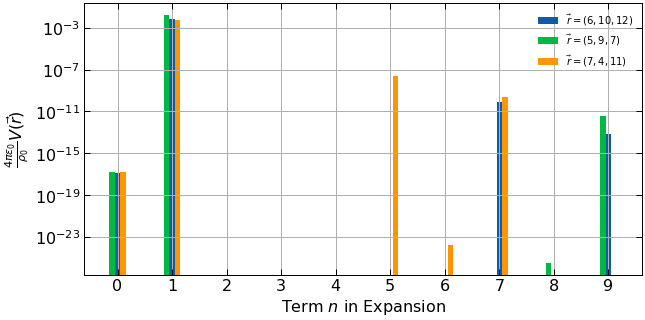

In [146]:
barWidth = 0.1
loc1 = ns
loc2 = ns-barWidth
loc3 = ns+barWidth

plt.figure(figsize=(10,5))
plt.grid()
plt.bar(loc1, terms_r1, width=barWidth, label=r'$\vec{r}=(6R,10R,12R)$')
plt.bar(loc2, terms_r2, width=barWidth, label=r'$\vec{r}=(5R,9R,7R)$')
plt.bar(loc3, terms_r3, width=barWidth, label=r'$\vec{r}=(7R,4R,11R)$')
plt.ylabel(r'$\frac{4 \pi \epsilon_0}{\rho_0}V(\vec{r}) $')
plt.xlabel('Term $n$ in Expansion')
plt.semilogy()
plt.minorticks_off()
plt.xticks(ns)
plt.legend(loc='upper right', fontsize=10)
plt.show()

## Part 2
Repeat part 1 for $N=2$.  Is there still a term that dominates in all cases?

In [147]:
ns = np.arange(0, 10)
terms_r1 = np.array([potential(6,10,12,n,2) for n in ns])
terms_r2 = np.array([potential(5,9,7,n,2) for n in ns])
terms_r3 = np.array([potential(7,4,11,n,2) for n in ns])

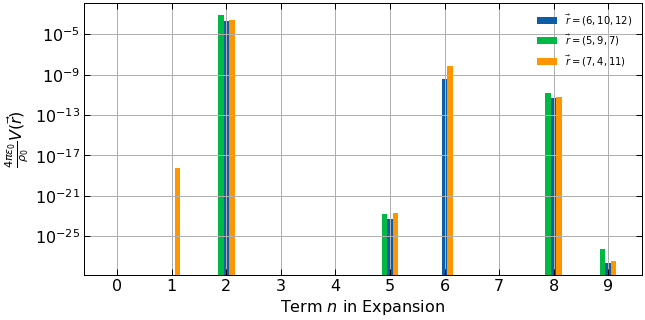

In [148]:
barWidth = 0.1
loc1 = ns
loc2 = ns-barWidth
loc3 = ns+barWidth

plt.figure(figsize=(10,5))
plt.grid()
plt.bar(loc1, terms_r1, width=barWidth, label=r'$\vec{r}=(6R,10R,12R)$')
plt.bar(loc2, terms_r2, width=barWidth, label=r'$\vec{r}=(5R,9R,7R)$')
plt.bar(loc3, terms_r3, width=barWidth, label=r'$\vec{r}=(7R,4R,11R)$')
plt.ylabel(r'$\frac{4 \pi \epsilon_0}{\rho_0}V(\vec{r}) $')
plt.xlabel('Term $n$ in Expansion')
plt.semilogy()
plt.minorticks_off()
plt.xticks(ns)
plt.legend(loc='upper right', fontsize=10)
plt.show()

## Part 3
Repeat part 1 for $N=3$. Is there still a term that dominates in all cases? Why or why not? *Hint: If there is a term that dominates in all three cases, then examine more points*.

In [149]:
ns = np.arange(0, 10)
terms_r1 = np.array([potential(6,10,12,n,3) for n in ns])
terms_r2 = np.array([potential(5,9,7,n,3) for n in ns])
terms_r3 = np.array([potential(7,4,11,n,3) for n in ns])

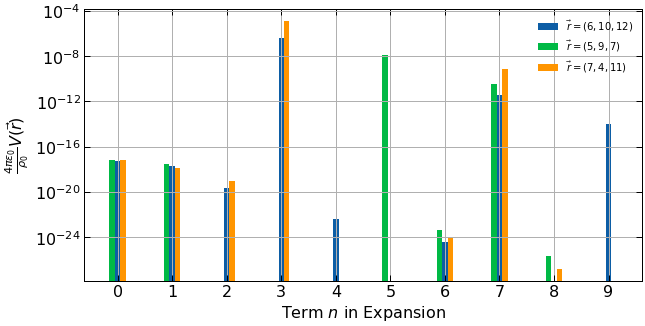

In [150]:
barWidth = 0.1
loc1 = ns
loc2 = ns-barWidth
loc3 = ns+barWidth

plt.figure(figsize=(10,5))
plt.grid()
plt.bar(loc1, terms_r1, width=barWidth, label=r'$\vec{r}=(6R,10R,12R)$')
plt.bar(loc2, terms_r2, width=barWidth, label=r'$\vec{r}=(5R,9R,7R)$')
plt.bar(loc3, terms_r3, width=barWidth, label=r'$\vec{r}=(7R,4R,11R)$')
plt.ylabel(r'$\frac{4 \pi \epsilon_0}{\rho_0}V(\vec{r}) $')
plt.xlabel('Term $n$ in Expansion')
plt.semilogy()
plt.minorticks_off()
plt.xticks(ns)
plt.legend(loc='upper right', fontsize=10)
plt.show()

There is no longer a term that dominates in all cases because this does not resemble an ideal dipole/quadropole/etc...